In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pickle
from tqdm import tqdm
import operator

sns.set()

%matplotlib inline

### Topic: Male vs. Female

In [3]:
def topic_male_vs_female(channel):
    topics = {}
    for topic in ['Other', 'Politics', 'Media', 'Fashion', 'Foreign Policy', 'Immigration', 
         'Economy', 'Health', 'Art', 'Gender', 'Sport', 'Violence', 'Climate']:
        topics[topic] = {'count': 0, 'male': 0, 'female': 0, 'ratio': 0,
                         'male_number': [0, 0, 0, 0, 0], 'female_number': [0, 0, 0, 0, 0],
                        'male_total_ratio': [], 'conditional_male_total_ratio': []} #1, 2, 3, 4, 5
    
    all_files = glob.glob('processed_data/%s/*.p'%channel)
    
    for file in all_files:
        data = pickle.load(open(file, 'rb'))
        for key in data.keys():
            topic = data[key]['Topics'][0]
            topics[topic]['count'] += 1
            if data[key]['gender'] is not None:
                for elements in data[key]['gender']:
                    if elements == 'm':
                        topics[topic]['male'] += 1
                    else:
                        topics[topic]['female'] += 1

                all_genders = np.array(data[key]['gender'])
                num_men = all_genders[all_genders=='m'].shape[0]
                num_female = all_genders[all_genders=='f'].shape[0]
                topics[topic]['male_total_ratio'].append(num_men/(num_men + num_female))
                if num_men + num_female >= 3:
                    topics[topic]['conditional_male_total_ratio'].append(num_men/(num_men + num_female))
                if len(all_genders) == 1:
                        continue
                if num_men > 0:
                    num_men = min(num_men-1, 4)
                    topics[topic]['male_number'][num_men] += 1
                if num_female > 0:
                    num_female = min(num_female-1, 4)
                    topics[topic]['female_number'][num_female] += 1

            topic = data[key]['Topics'][1]
            
            if data[key]['gender'] is not None:
                for elements in data[key]['gender']:
                    if elements == 'm':
                        topics[topic]['male'] += 1
                    else:
                        topics[topic]['female'] += 1
            
    for key in topics.keys():
        if topics[key]['female'] == 0:
            topics[key]['ratio'] = None
            continue
        topics[key]['ratio'] = topics[key]['male']/topics[key]['female']
        
    total_male = 0; total_female = 0;
    for key in topics.keys():
        total_male += topics[key]['male']
        total_female += topics[key]['female']
    topics['Total'] = {'male': total_male, 'female': total_female, 'ratio': total_male/total_female}
    
    return topics

In [4]:
channel = "CNN"
CNN = topic_male_vs_female(channel)

# -1
Ratio of each topic.

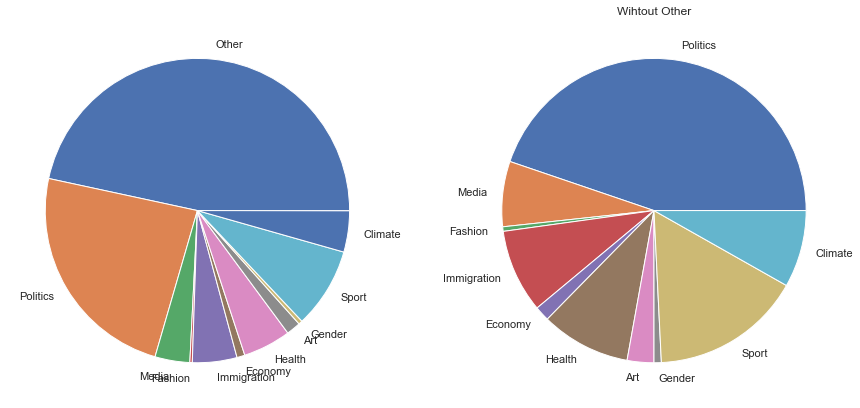

In [5]:
total = 0
for key in CNN.keys():
    if key == 'Foreign Policy' or key == 'Total':
        continue
    total += CNN[key]['count']
all_topics = ['Other', 'Politics', 'Media', 'Fashion', 'Immigration', 
     'Economy', 'Health', 'Art', 'Gender', 'Sport', 'Climate']
all_ratios = []
plt.figure(figsize=(15,10))
for key in all_topics:
    all_ratios.append(CNN[key]['count']/total)
plt.subplot(1,2,1)
plt.pie(all_ratios, labels=all_topics);

all_topics = ['Politics', 'Media', 'Fashion', 'Immigration', 
     'Economy', 'Health', 'Art', 'Gender', 'Sport',  'Climate']
total = 0
for key in all_topics:
    if key == 'Foreign Policy' or key == 'Total' or key == 'Other':
        continue
    total += CNN[key]['count']

all_ratios = []
for key in all_topics:
    all_ratios.append(CNN[key]['count']/total)
plt.subplot(1,2,2)
plt.pie(all_ratios, labels=all_topics);
plt.title('Wihtout Other');

# 0.
Ratio in each topic, normalized by mean of the channel.
PS : I think we need to normalize by each channel for data to be meaningful, happy to discuss if someone disagrees!

Other 0.6902599626333517
Politics 0.6951585887857922
Media 0.6917655579698033
Fashion 0.6906526994359388
Immigration 0.6926505452821242
Economy 0.7017900732302685
Health 0.6854640861387488
Art 0.6941799980370988
Gender 0.7022132796780685
Sport 0.687133958320399
Climate 0.7213581376435906


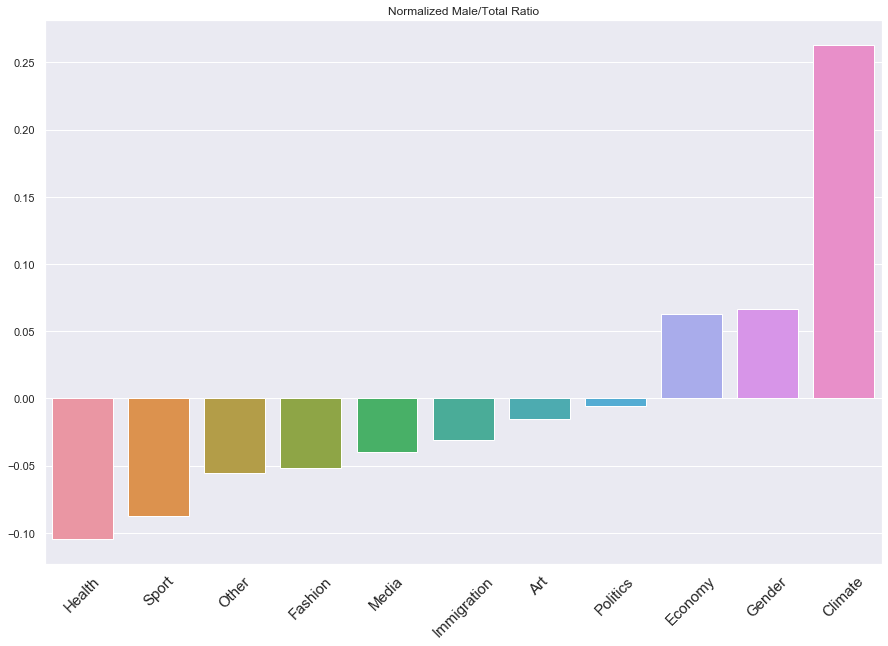

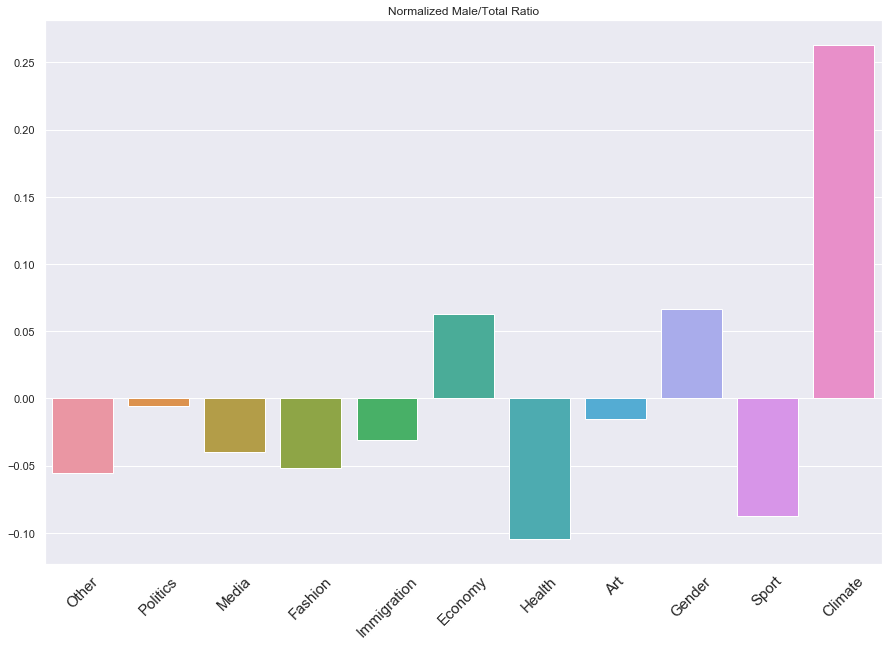

In [6]:
ratios = {}
all_topics = ['Other', 'Politics', 'Media', 'Fashion', 'Immigration', 
     'Economy', 'Health', 'Art', 'Gender', 'Sport', 'Climate']
for topic in all_topics:
    ratios[topic] = {'male/total': 0}
all_ratios = []
for key in CNN.keys():
    if key == 'Total' or key == 'Foreign Policy' or key == 'Violence':
        continue    
    ratios[key]['male/total'] = CNN[key]['male']/(CNN[key]['male'] + CNN[key]['female'])
    print(key, ratios[key]['male/total'])
    all_ratios.append(ratios[key]['male/total'])
average = np.mean(all_ratios)
std = np.std(all_ratios)
all_ratios = []
for key in ratios.keys():
    all_ratios.append((ratios[key]['male/total'] - average)/np.sqrt(std))
idx = np.argsort(all_ratios)
plt.figure(figsize=(15, 10))
sns.barplot(np.arange(len(all_topics)), np.array(all_ratios)[idx])
plt.xticks(np.arange(len(all_topics)), np.array(all_topics)[idx], fontsize=15, rotation=45);
plt.title('Normalized Male/Total Ratio');

plt.figure(figsize=(15, 10))
sns.barplot(np.arange(len(all_topics)), np.array(all_ratios))
plt.xticks(np.arange(len(all_topics)), np.array(all_topics), fontsize=15, rotation=45);
plt.title('Normalized Male/Total Ratio');

# 1.
Male/(Male + Female) distribution. Question: Is it the case that it's mostly men, mostly women of it is usually mixed?  

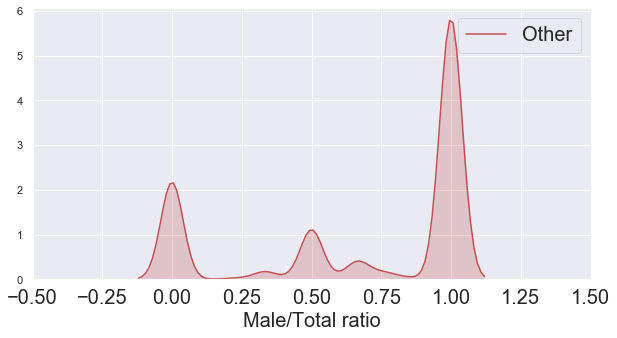

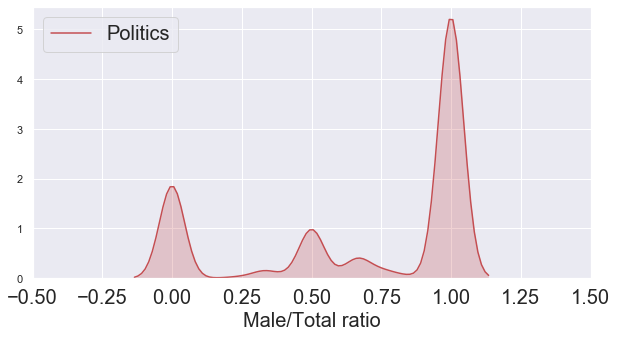

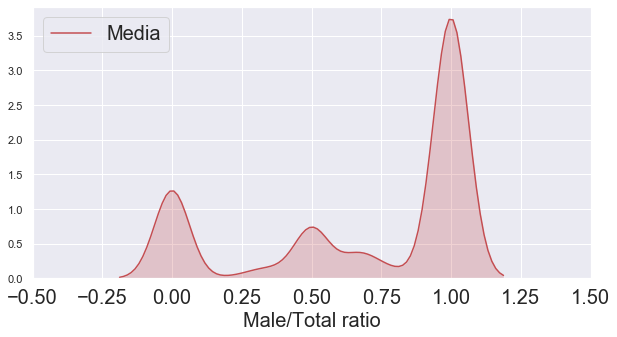

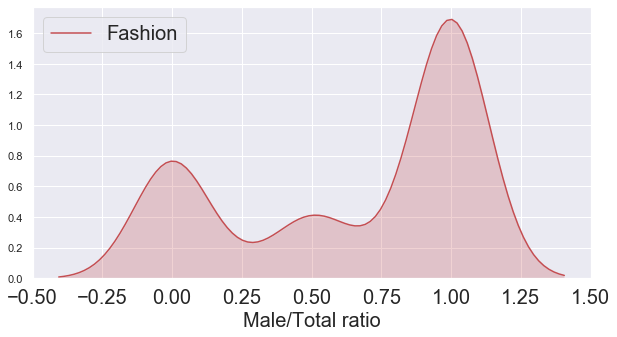

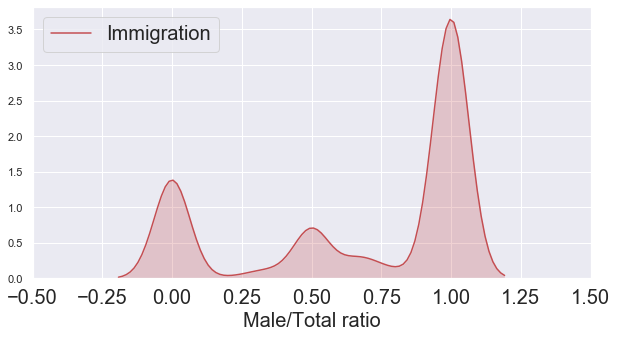

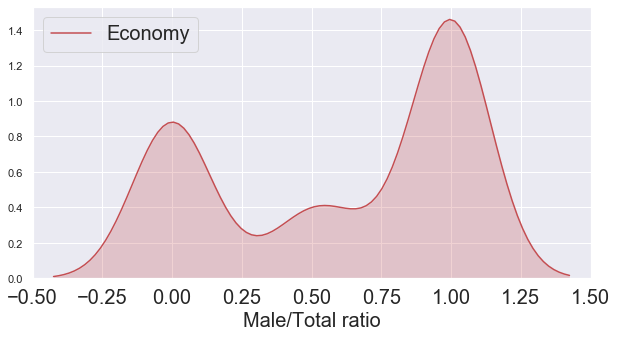

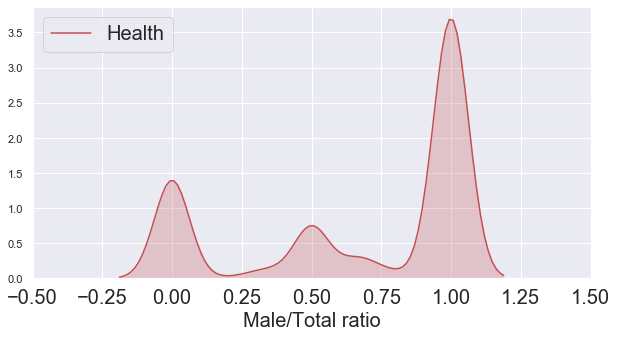

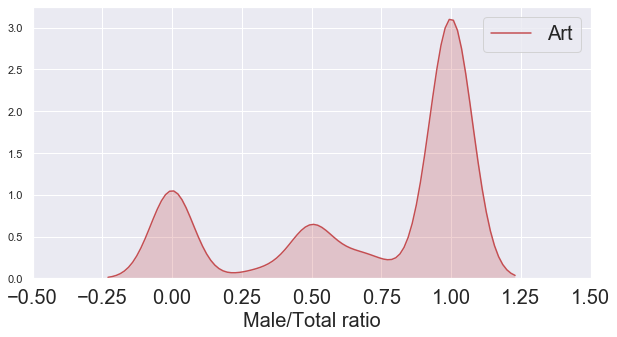

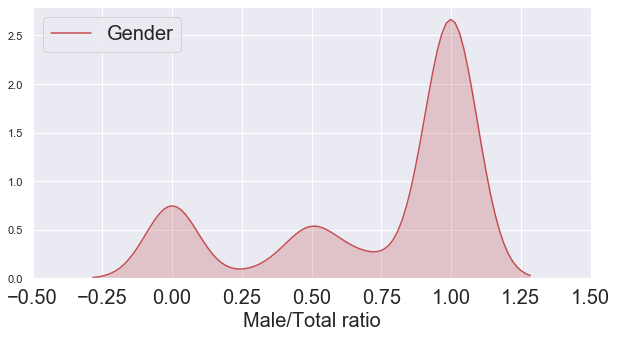

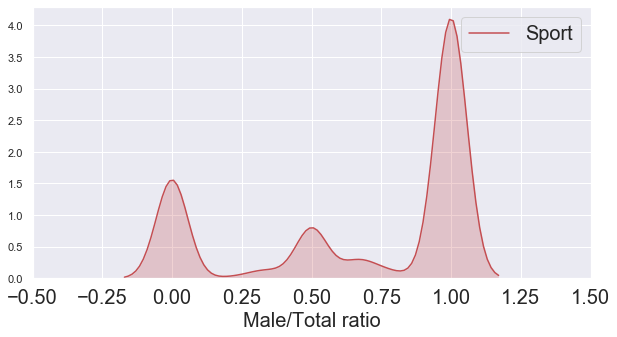

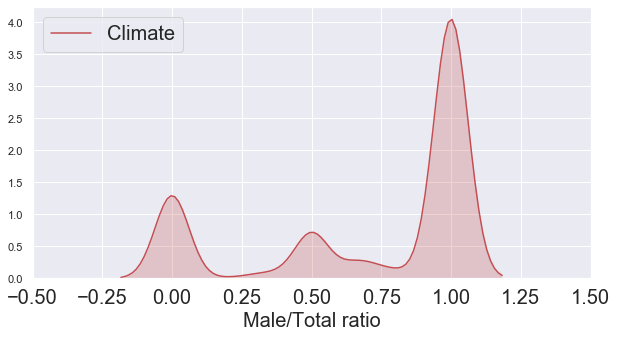

In [309]:
for key in CNN.keys():
    if key == 'Total' or key == 'Foreign Policy' or key == 'Violence':
        continue
    plt.figure(figsize=(10,5))
    sns.kdeplot(CNN[key]['male_total_ratio'], label=key,
                                              color='r', shade=True)
    plt.legend(fontsize = 20)
    plt.xlabel("Male/Total ratio", fontsize=20)
    plt.xticks(fontsize=20)
    plt.xlim([-0.5, 1.5])

# 2.
Male/(Male + Female) distribution. Question: Is it the case that it's mostly men, mostly women of it is usually mixed?  

Same but now distribution is conditional on number of people >= 3: So when they are alot of people on the screen, how is the ratio?

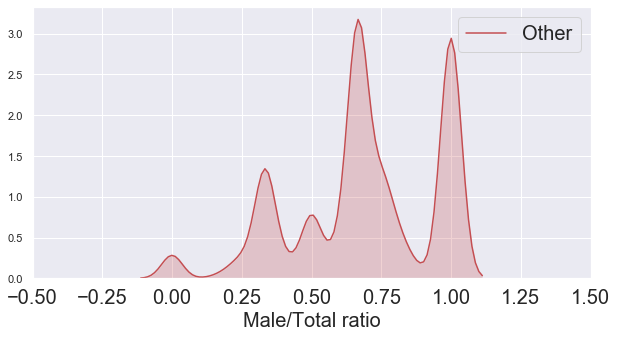

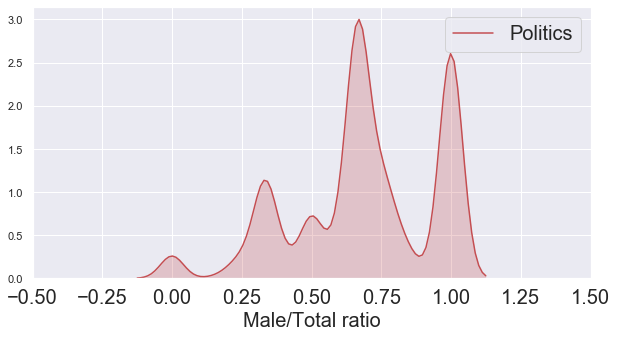

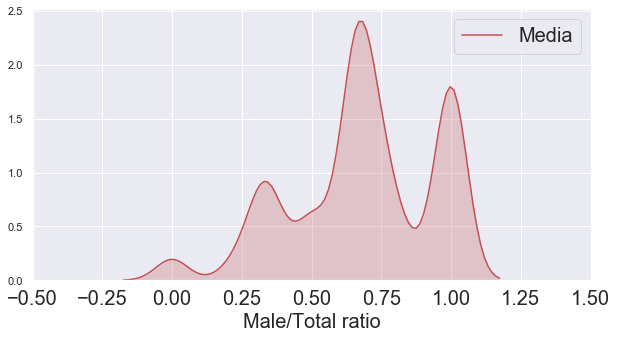

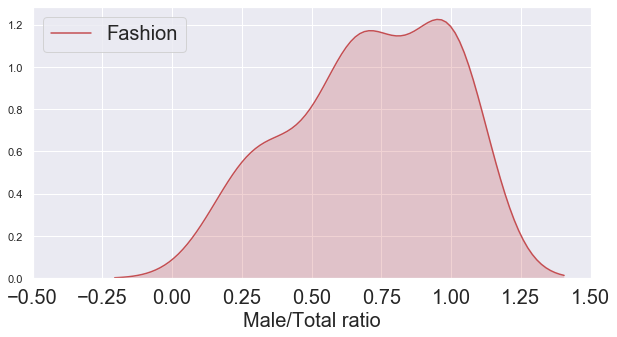

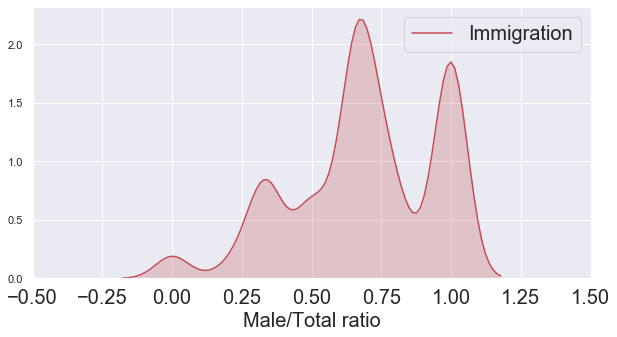

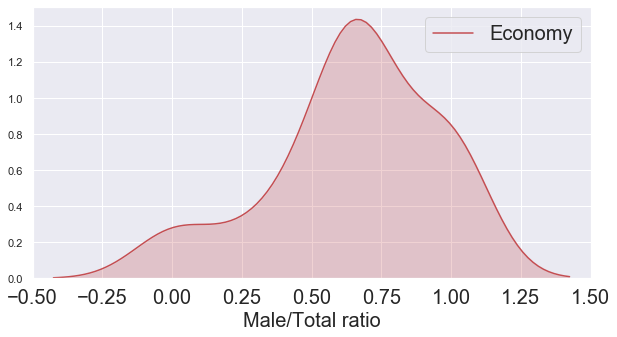

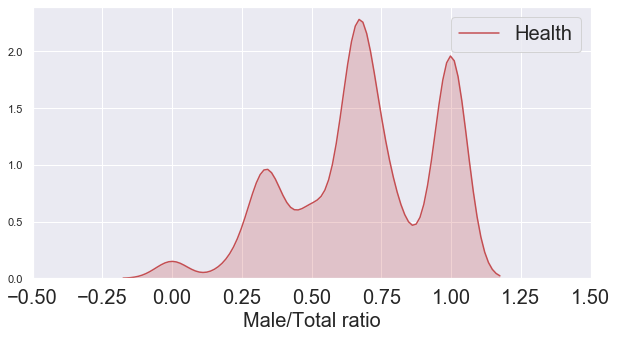

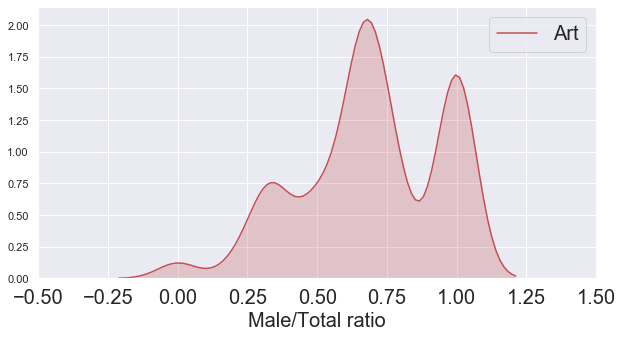

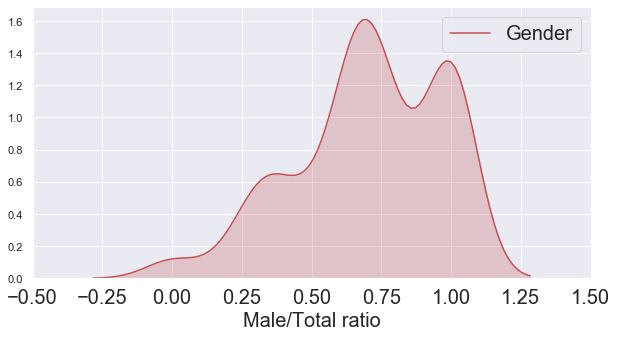

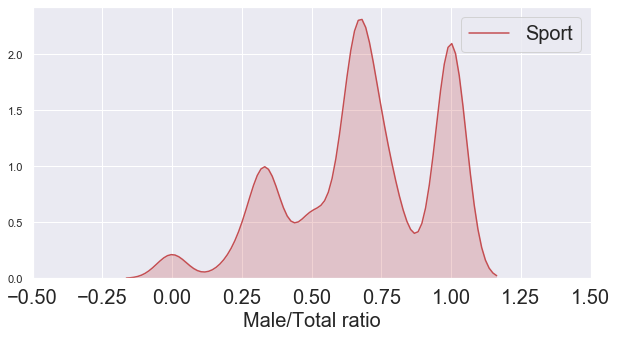

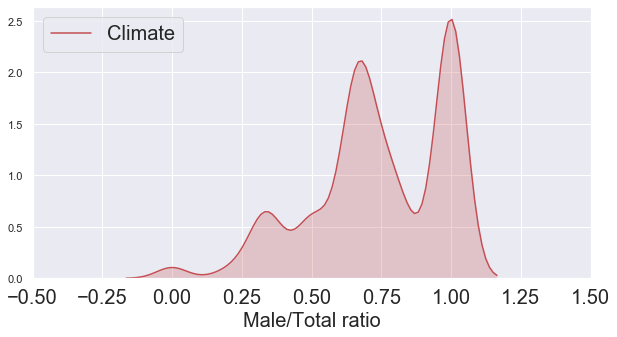

In [310]:
for key in CNN.keys():
    if key == 'Total' or key == 'Foreign Policy' or key == 'Violence':
        continue
    plt.figure(figsize=(10,5))
    sns.kdeplot(CNN[key]['conditional_male_total_ratio'], label=key,
                                              color='r', shade=True)
    plt.legend(fontsize = 20)
    plt.xlabel("Male/Total ratio", fontsize=20)
    plt.xticks(fontsize=20)
    plt.xlim([-0.5, 1.5])

# 3.
Distribution of number of male or female on the screen. (Not that interesting! :D) 

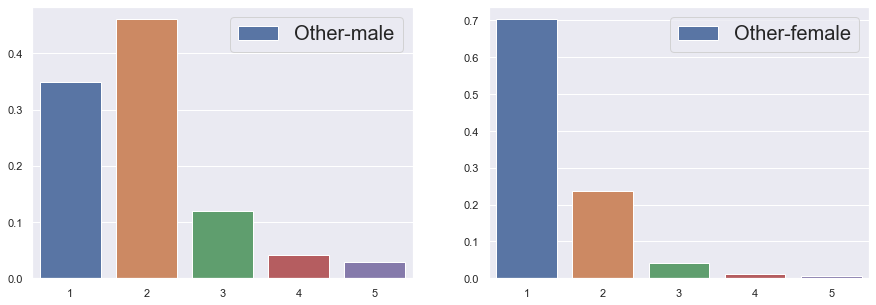

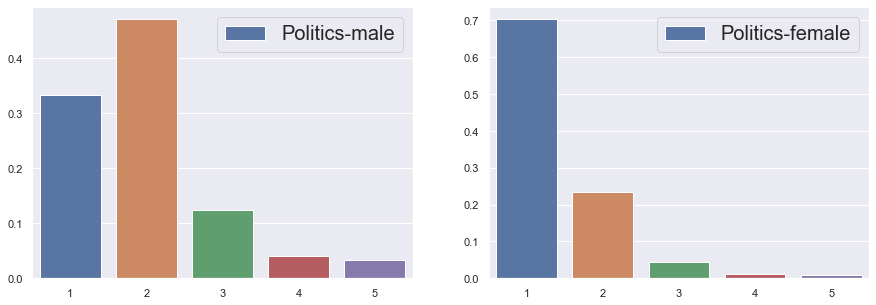

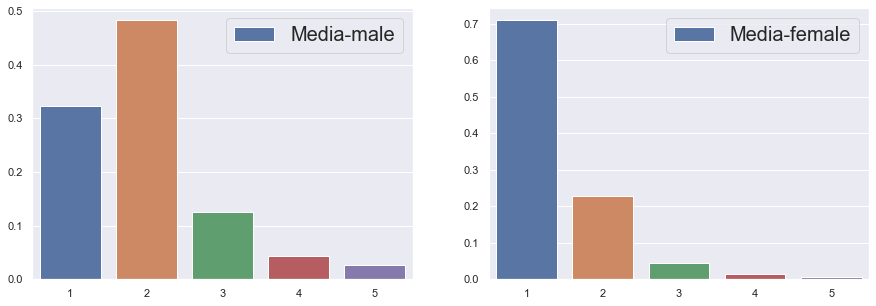

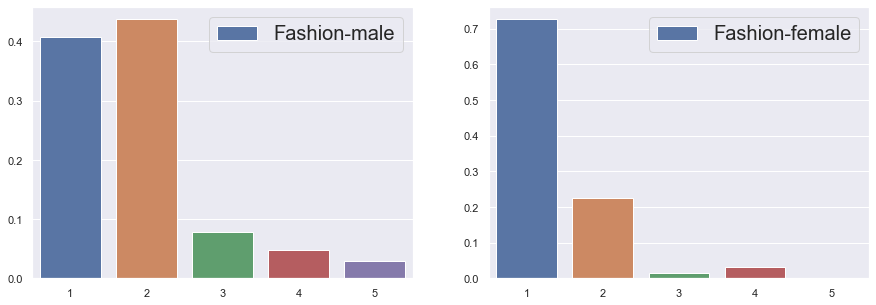

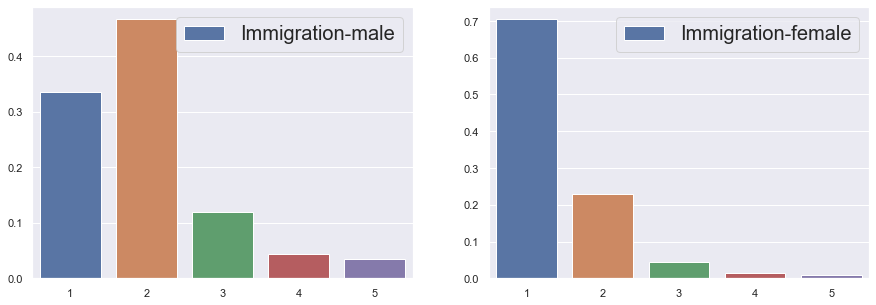

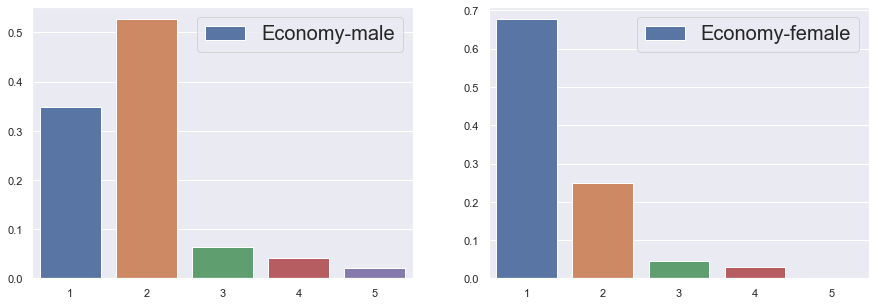

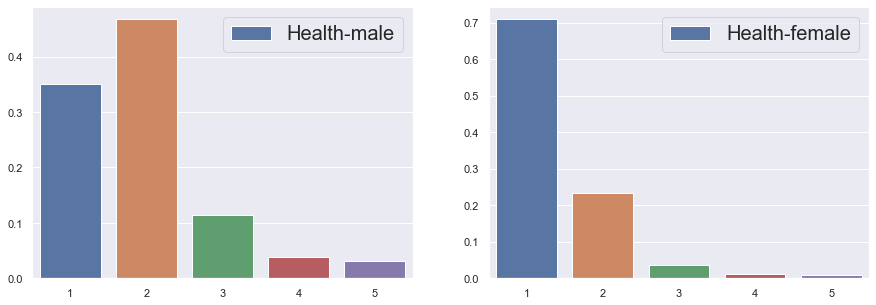

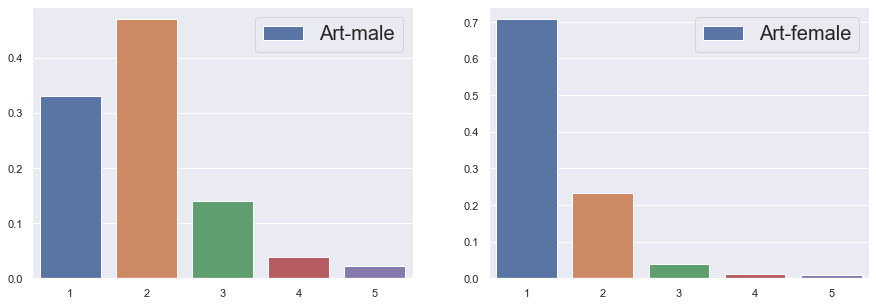

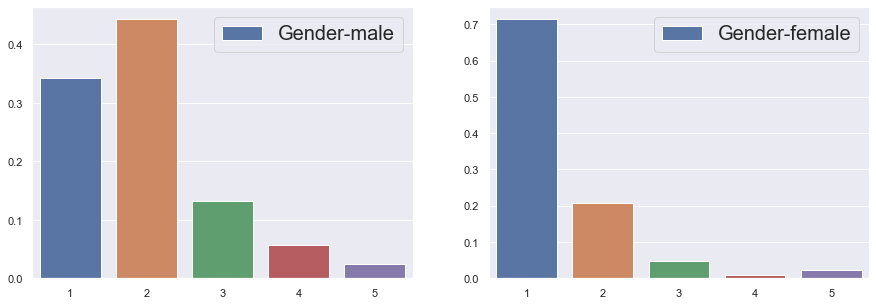

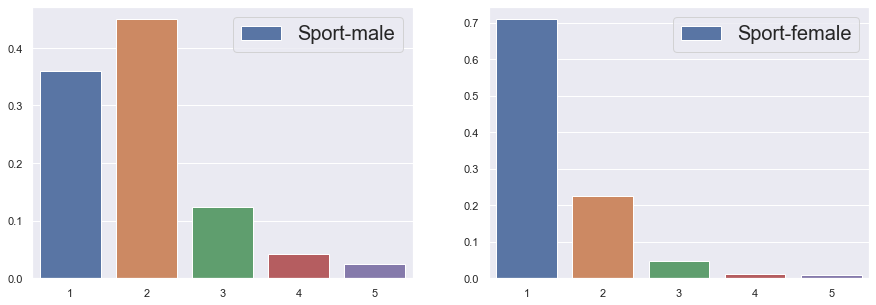

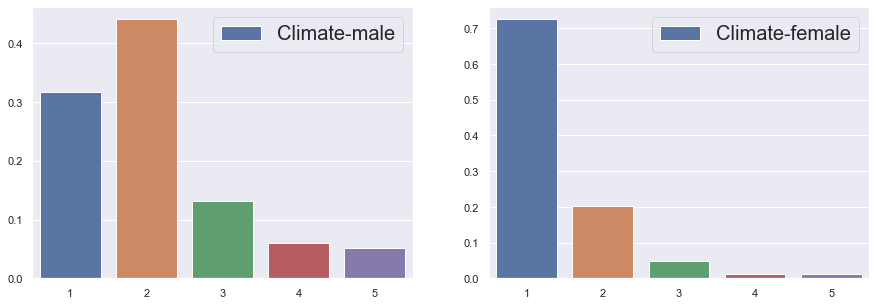

In [311]:
for key in CNN.keys():
    if key == 'Total' or key == 'Foreign Policy' or key == 'Violence':
        continue
    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    sns.barplot([1, 2, 3, 4, 5], CNN[key]['male_number']/np.sum(CNN[key]['male_number']), label=key+'-male')
    plt.legend(fontsize=20)
    plt.subplot(1,2,2)
    sns.barplot([1, 2, 3, 4, 5], CNN[key]['female_number']/np.sum(CNN[key]['female_number']), label=key+'-female')
    plt.legend(fontsize=20)

# Topic Peoples
**THIS HAS TO BE CHERRY PICKED IF WE WANNA TALK ABOUT IT**

In [312]:
def topic_people(channel):
    topics = {}
    for topic in ['Other', 'Politics', 'Media', 'Fashion', 'Foreign Policy', 'Immigration', 
         'Economy', 'Health', 'Art', 'Gender', 'Sport', 'Violence', 'Climate']:
        topics[topic] = {}
    all_files = glob.glob('processed_data/%s/*.p'%channel)
    
    for file in all_files:
        data = pickle.load(open(file, 'rb'))
        for key in data.keys():
            topic = data[key]['Topics'][0]
            if data[key]['persons'] is not None:
                persons = data[key]['persons']
                for person in persons:
                    if person in topics[topic].keys():
                        topics[topic][person] += 1
                    else:
                        topics[topic][person] = 1
    
    return topics

In [313]:
CNN_Topics = topic_people(channel)

In [314]:
for key in CNN_Topics.keys():
    CNN_Topics[key] = sorted(CNN_Topics[key].items(), key=operator.itemgetter(1), reverse=True)

In [316]:
for key in CNN_Topics.keys():
    if key == 'Total' or key == 'Foreign Policy' or key == 'Violence':
        continue
    print("============= " + key + " =============")
    print(CNN_Topics[key][:50])
    print("=============")

============= Other =============
[('anderson cooper', 1936), ('donald trump', 1817), ('hillary clinton', 1254), ('barack obama', 1060), ('don lemon', 908), ('rachel maddow', 825), ('wolf blitzer', 794), ('brooke baldwin', 788), ('chris hayes', 729), ('erin burnett', 708), ('sean hannity', 707), ('megyn kelly', 668), ('john berman', 645), ('tucker carlson', 641), ("bill o'reilly", 605), ('chris matthews', 560), ('jake tapper', 527), ('piers morgan', 520), ('fredricka whitfield', 512), ('neil cavuto', 453), ('ted cruz', 448), ('sean spicer', 441), ('greg gutfeld', 430), ('jeanine pirro', 401), ('chris cuomo', 386), ('chuck todd', 376), ('dana bash', 372), ("lawrence o'donnell", 372), ('john king', 371), ('bret baier', 354), ('bernie sanders', 353), ('joe scarborough', 325), ('ali velshi', 316), ('carol costello', 314), ('jesse watters', 312), ('greta van susteren', 309), ('steve kornacki', 309), ('mike pence', 304), ('kate bolduan', 304), ('martha maccallum', 304), ('howard kurtz', 298)